<h1><center>Titanic EDA + Prediction</center></h1>

Table of Contents: <a id=100></a>

1. [Adding basic libraries & importing the dataset](#1)
2. [Visual EDA and feature engineering](#2)
3. [Imputing missing data and handling categorical variables](#3)
4. [Model Development](#4)

## 1. Adding basic libraries & importing the dataset <a id=1></a>

# This code imports essential libraries for data analysis and visualization in Python. NumPy (numerical operations), Pandas (data manipulation), Seaborn (statistical graphics), and Matplotlib (plotting) are included. The %matplotlib inline command allows visualizations to be displayed directly in Jupyter notebooks, enhancing interactive data exploration.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# This code loads two datasets from a Kaggle Titanic competition: the training set (train.csv) and the test set (test.csv). The pd.read_csv function from Pandas reads the CSV files into DataFrames, df_train and df_test, which are used for data analysis and model building.

In [6]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# The df_train.head() function displays the first five rows of the training DataFrame df_train. This method provides a quick overview of the dataset's structure, including columns, data types, and sample values, helping users understand the data before further analysis or preprocessing

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The df_test.head() function displays the first five rows of the test DataFrame df_test. This method gives a preview of the dataset's structure, including its columns and sample values, allowing users to quickly assess the data before performing analyses or making predictions with a model.

In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# The print(df_train.shape) and print(df_test.shape) statements output the dimensions of the training and test DataFrames, respectively. Each shape is represented as a tuple showing the number of rows and columns. This information helps users understand the size and structure of the datasets for analysis.

In [9]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


## 2. Visual EDA and feature engineering <a id=2></a>

# The df_train.corr() function calculates the correlation matrix for numerical columns in the df_train DataFrame. This matrix displays the pairwise correlation coefficients, indicating the strength and direction of relationships between variables. It's useful for identifying potential predictors and understanding the dataset's underlying patterns

In [10]:
# Correlation between different features and Survived
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000



# The sns.heatmap(df_train.corr()) function creates a heatmap visualization of the correlation matrix from the training DataFrame. It visually represents the strength of correlations between variables using color gradients. The plt.show() command displays the heatmap, aiding in the identification of relationships and patterns among the dataset's features

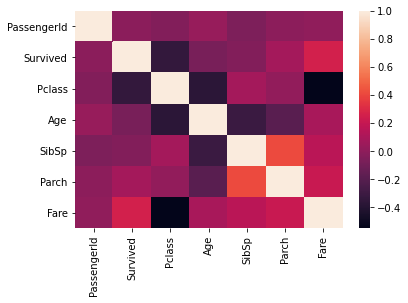

In [11]:
# Heatmap of the correlation
sns.heatmap(df_train.corr())
plt.show()

# This code customizes Seaborn's visual style with a dark background, red-blue color palette, and larger context for better visibility. The sns.catplot() function creates a count plot of the Survived variable from the df_train DataFrame, illustrating the distribution of survival counts among passengers. The plot is then displayed.

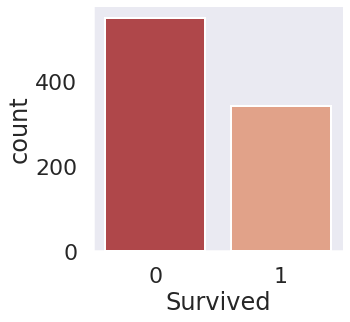

In [12]:
# Count of Survived people
sns.set_style('dark')
sns.set_palette('RdBu')
sns.set_context('poster')
sns.catplot(x = 'Survived',data=df_train, kind='count')
plt.show()


# This code sets a custom color palette with red and green hues for the plot. The sns.catplot() function generates a count plot of the Pclass variable from df_train, distinguishing survival status (Survived) using color. This visualization helps analyze survival rates across different passenger classes. The plot is then displayed

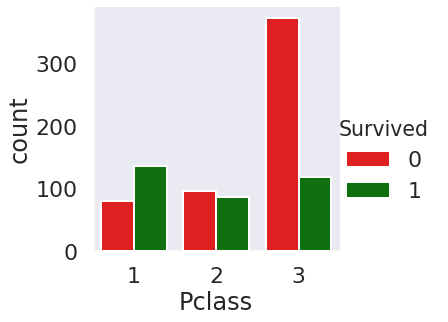

In [13]:
# Count of Survived people belonging to different Pclass
sns.set_palette(['Red','Green'])
sns.catplot(x = 'Pclass',data=df_train, kind='count',hue='Survived')
plt.show()

# This code sets a color palette of red and green for the plot. The sns.catplot() function creates a count plot for the Sex variable in the df_train DataFrame, using color to differentiate survival status (Survived). This visualization highlights gender-related survival trends among passengers. The plot is then displayed.

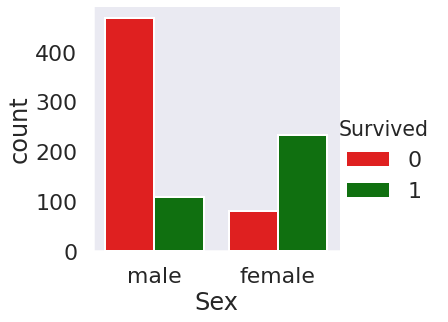

In [14]:
# Count of Survived people of each Sex
sns.set_palette(['Red','Green'])
sns.catplot(x = 'Sex', data = df_train, kind='count', hue='Survived')
plt.show()

# This code sets the Seaborn context to "notebook" for appropriate sizing. The sns.catplot() function generates a box plot to visualize the distribution of Age across the Survived variable in the df_train DataFrame. This visualization reveals age-related survival trends among passengers. The plot is then displayed.

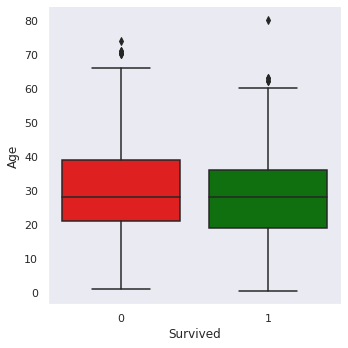

In [15]:
# Distribution of Age among the Survived people
sns.set_context('notebook')
sns.catplot(x = 'Survived', y='Age', data=df_train,kind='box')
plt.show()

# This code uses sns.catplot() to create a bar plot that displays the average `Fare` paid by passengers based on their survival status (Survived) in the df_train DataFrame. This visualization highlights the differences in fare amounts between those who survived and those who did not. The plot is then displayed.

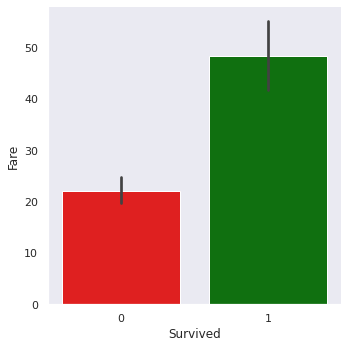

In [16]:
# Relation between the survived people and their fare
sns.catplot(x = 'Survived', y='Fare', data=df_train, kind='bar')
plt.show()

# This code generates a count plot using sns.catplot() to visualize the number of passengers by embarkation port (Embarked) in the df_train DataFrame. The hue=Survived parameter differentiates survival status with color, illustrating survival trends across different embarkation points. The plot is then displayed.

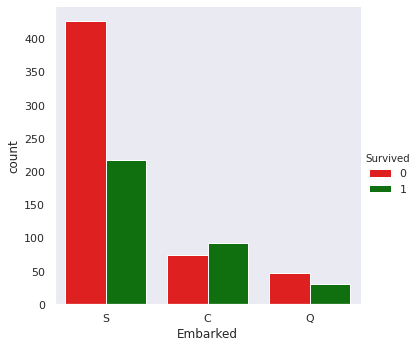

In [17]:
# Count of Survived people from each Embarking
sns.catplot(x = 'Embarked', data = df_train, kind='count', hue='Survived')
plt.show()

## 3. Imputing missing data and handling categorical variables <a id=3></a>

# This code handles missing values in the df_train and df_test DataFrames. It fills missing Age entries with the mean age, replaces missing Cabin values with "Missing," and drops any remaining rows with missing data in df_train. It also fills missing Fare values with the mean fare in df_test.

In [18]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
df_train['Cabin'] = df_train['Cabin'].fillna('Missing')
df_test['Cabin'] = df_test['Cabin'].fillna('Missing')
df_train = df_train.dropna()
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

# The df_train.isnull().sum() function calculates and displays the total number of missing (null) values for each column in the df_train DataFrame. This output helps identify which features contain missing data, guiding subsequent data cleaning and preprocessing efforts to prepare the dataset for analysis or modeling.

In [19]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# The df_test.isnull().sum() function computes and displays the count of missing (null) values for each column in the df_test DataFrame. This output helps identify columns with incomplete data, informing decisions on how to handle missing values during preprocessing before analysis or predictive modeling.

In [20]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# This code removes the Name, Ticket, and Cabin columns from both the df_train and df_test DataFrames. The drop() function is used to eliminate these features, likely due to their irrelevance or high cardinality, simplifying the datasets for further analysis and modeling.

In [21]:
df_train = df_train.drop(columns=['Name'],axis=1)
df_test = df_test.drop(columns=['Name'],axis=1)
df_train = df_train.drop(columns=['Ticket'],axis=1)
df_test = df_test.drop(columns=['Ticket'],axis=1)
df_train = df_train.drop(columns=['Cabin'], axis=1)
df_test = df_test.drop(columns=['Cabin'], axis=1)

# This code creates a mapping dictionary, sex_map, to convert categorical gender data into numerical format: males are mapped to 0 and females to 1. The map() function is applied to the Sex column in both df_train and df_test, facilitating easier analysis and modeling of the data.

In [22]:
sex_map = {
        'male':0,
    'female':1
}
df_train.loc[: ,'Sex'] = df_train['Sex'].map(sex_map)
df_test.loc[: , 'Sex'] = df_test['Sex'].map(sex_map)

# This code uses pd.get_dummies() to convert the categorical Embarked variable into one-hot encoded columns in both df_train and df_test DataFrames. Each unique embarkation location gets its own binary column, helping to facilitate numerical analysis and modeling by transforming categorical data into a suitable format.

In [23]:
df_train = pd.get_dummies(df_train, prefix_sep='_',columns=['Embarked'])
df_test = pd.get_dummies(df_test, prefix_sep='_',columns=['Embarked'])

# The df_train.head() function displays the first five rows of the training DataFrame, df_train. This method provides a snapshot of the dataset's structure, including column names and data types, allowing users to quickly assess the information and verify recent modifications, such as encoding and missing value handling.

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


# The df_test.head() function displays the first five rows of the test DataFrame, df_test. This output offers a quick overview of the dataset's structure, including column names and sample data, allowing users to verify recent changes, such as one-hot encoding, and assess the test dataset before analysis.

In [25]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


# The print(df_train.shape) and print(df_test.shape) statements output the dimensions of the training and test DataFrames, respectively. Each shape is represented as a tuple indicating the number of rows and columns, providing insight into the size of the datasets, which is essential for analysis and modeling considerations.

In [26]:
print(df_train.shape)
print(df_test.shape)

(889, 11)
(418, 10)


## 4. Model Development <a id=4></a>

# This code imports various machine learning models and techniques from the Scikit-learn library and XGBoost. Base models include Decision Tree, Logistic Regression, and K-Neighbors Classifier. Ensembling techniques encompass Voting, AdaBoost, and Gradient Boosting classifiers. Additionally, it imports metrics and utilities for model evaluation and hyperparameter tuning.

In [27]:
# Base Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

# Ensembling Techniques
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# This code separates the features and target variable from the df_train DataFrame. The variable X contains all columns except Survive, serving as the input features, while y holds the target values (survival status) as a NumPy array. This prepares the data for model training.

In [28]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived'].values

# This code uses train_test_split to divide the dataset into training and testing subsets. X_train and y_train contain 80% of the features and target variable for training, while X_test and y_test hold 20% for evaluation. This ensures proper assessment of model performance on unseen data.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# The print() statements display the dimensions of the training and testing datasets for both features and target variables. X_train.shape and X_test.shape show the number of rows and columns in the feature sets, while y_train.shape and y_test.shape indicate the number of samples in the target arrays.

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 10)
(178, 10)
(711,)
(178,)


# This code initializes three classifiers: Logistic Regression, K-Neighbors Classifier, and Decision Tree. Each classifier is trained on the X_train and y_train data. The predicted values for X_test are evaluated using accuracy and ROC AUC scores, which are printed alongside each classifier's name for performance comparison.

In [31]:
# Base Classifiers
lr = LogisticRegression(max_iter=10000)
knn=KNN()
dt = DecisionTreeClassifier()
classifiers = [('LogisticRegression',lr),
              ('KNeighborsClassifier',knn),
              ('ClassificationTree',dt)]
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf_name, 'Accuracy Score' , accuracy_score(y_test,y_pred) , " " , 'ROC AUC Score' , roc_auc_score(y_test, y_pred))

LogisticRegression Accuracy Score 0.8258426966292135   ROC AUC Score 0.8113871635610767
KNeighborsClassifier Accuracy Score 0.6685393258426966   ROC AUC Score 0.6071083505866114
ClassificationTree Accuracy Score 0.7415730337078652   ROC AUC Score 0.7425810904071773


# This code initializes a Voting Classifier, combining the previously defined classifiers into a single ensemble model. It fits the ensemble to the training data (X_trai and y_train) and predicts outcomes for X_test. The accuracy and ROC AUC scores of the Voting Classifier are then printed, assessing its performance.

In [32]:
# Voting Classifier
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier', 'Accuracy Score' , accuracy_score(y_test,y_pred) , " " , 'ROC AUC Score' , roc_auc_score(y_test, y_pred))

Voting Classifier Accuracy Score 0.8089887640449438   ROC AUC Score 0.798343685300207


# This code initializes an AdaBoost Classifier with a Decision Tree as the base estimator and 100 boosting iterations. It fits the model to the training data (X_train and y_train), then predicts outcomes for X_test. The accuracy and ROC AUC scores are printed to evaluate the model's performance.

In [33]:
# AdaBoost Classifier
adb_clf = AdaBoostClassifier(base_estimator = dt, n_estimators = 100)
adb_clf.fit(X_train, y_train)
y_pred = adb_clf.predict(X_test)
print('AdaBoostClassifier', 'Accuracy Score' , accuracy_score(y_test,y_pred) , " " , 'ROC AUC Score' , roc_auc_score(y_test, y_pred))

AdaBoostClassifier Accuracy Score 0.7359550561797753   ROC AUC Score 0.738233264320221


# This code initializes a Gradient Boosting Classifier and fits it to the training data (X_train and y_train). After training, it predicts outcomes for the test set (X_test). The accuracy and ROC AUC scores are then printed, providing a measure of the model's effectiveness in classification.

In [34]:
# GradientBoosting Classifier
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)
print('GradientBoostingClassifier', 'Accuracy Score' , accuracy_score(y_test,y_pred) , " " , 'ROC AUC Score' , roc_auc_score(y_test, y_pred))

GradientBoostingClassifier Accuracy Score 0.8426966292134831   ROC AUC Score 0.8172532781228433


# This code initializes a Stochastic Gradient Boosting Classifier with specified parameters: a maximum depth of 1, subsampling of 80%, and 20% feature usage for each tree. It fits the model to the training data (X_train and y_train), predicts outcomes for the test set, and prints the accuracy and ROC AUC scores.

In [35]:
# Stochastic GradientBoostingClassifier
sgbt = GradientBoostingClassifier(max_depth=1,subsample=0.8,max_features=0.2,n_estimators=300,random_state=21)
sgbt.fit(X_train, y_train)
y_pred = sgbt.predict(X_test)
print('Stochastic GradientBoostingClassifier', 'Accuracy Score' , accuracy_score(y_test,y_pred) , " " , 'ROC AUC Score' , roc_auc_score(y_test, y_pred))

Stochastic GradientBoostingClassifier Accuracy Score 0.8426966292134831   ROC AUC Score 0.831608005521049


# This code initializes an XGBoost classifier with a binary logistic objective and a random seed of 123. It fits the model to the training data (X_train and y_train), then predicts outcomes for the test set (X_test). The accuracy and ROC AUC scores are printed to evaluate the model's performance.

In [36]:
# XGBoost
xg_cl = xgb.XGBClassifier(objective='binary:logistic',
                         seed=123)
xg_cl.fit(X_train, y_train)
y_pred = xg_cl.predict(X_test)
print('XGBoost', 'Accuracy Score' , accuracy_score(y_test,y_pred) , " " , 'ROC AUC Score' , roc_auc_score(y_test, y_pred))

XGBoost Accuracy Score 0.8146067415730337   ROC AUC Score 0.7919254658385094


# The code creates an XGBoost classifier configured for binary classification with a logistic objective and a random seed of 123 for reproducibility. It trains the model using the training dataset (X_train and y_train), makes predictions on the test dataset (X_test), and evaluates performance using accuracy and ROC AUC scores.

In [37]:
## The highest ROC AUC Score and Accuracy is given by GradientBoostingClassifier
# GradientBoostingClassifier
sgbt = GradientBoostingClassifier(max_depth=1,subsample=0.8,max_features=0.2,n_estimators=300,random_state=21)
sgbt.fit(X_train, y_train)
y_pred = sgbt.predict(X_test)
print('Stochastic GradientBoostingClassifier', 'Accuracy Score' , accuracy_score(y_test,y_pred) , " " , 'ROC AUC Score' , roc_auc_score(y_test, y_pred))

Stochastic GradientBoostingClassifier Accuracy Score 0.8426966292134831   ROC AUC Score 0.831608005521049


# This code uses the trained Stochastic Gradient Boosting Classifier (sgbt) to predict outcomes for the df_test dataset. The predicted values are stored in y_pred, which indicates the survival status for each passenger in the test set. This allows for evaluation of model performance on unseen data.

In [38]:
y_pred = sgbt.predict(df_test)

# This code assigns the predicted survival outcomes (y_pred) to a new column named Survived in the df_test DataFrame. This addition allows for easy comparison of predicted results with actual outcomes (if available) and facilitates further analysis or submission to a competition platform like Kaggle.

In [39]:
df_test['Survived'] = y_pred

# The df_test DataFrame contains the test dataset used for predicting outcomes in a machine learning task, such as the Titanic survival prediction. It includes various passenger features, such as age, sex, and ticket class, along with the newly added Survived column, which indicates predicted survival status for each passenger.

In [40]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,0,34.50000,0,0,7.8292,0,1,0,0
1,893,3,1,47.00000,1,0,7.0000,0,0,1,0
2,894,2,0,62.00000,0,0,9.6875,0,1,0,0
3,895,3,0,27.00000,0,0,8.6625,0,0,1,0
4,896,3,1,22.00000,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500,0,0,1,0
414,1306,1,1,39.00000,0,0,108.9000,1,0,0,1
415,1307,3,0,38.50000,0,0,7.2500,0,0,1,0
416,1308,3,0,30.27259,0,0,8.0500,0,0,1,0


# This code creates a new DataFrame, df_submission, by dropping specific columns from df_test, including passenger features like Pclass, Sex, Age, SibSp, Parch, Fare, and embarkation dummy variables. This results in a simplified dataset containing only relevant information for submission, typically including the Survived column.

In [41]:
df_submission = df_test.drop(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S"],axis=1)

# The df_submission.head() function displays the first five rows of the df_submission DataFrame. This output provides a quick overview of the submission format, showing the relevant columns, including PassengerId and Survived, allowing users to verify the structure and contents before finalizing their submission for evaluation.

In [42]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# The code loads the gender_submission.csv file into the gender_submission DataFrame using Pandas. The gender_submission.head() function displays the first five rows of this DataFrame, providing a preview of the submission format used in the Titanic competition, typically including columns for PassengerId and predicted survival outcomes.

In [43]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# This code exports the df_submission DataFrame to a CSV file named results.csv without including the index. This file contains the submission data, typically formatted for competition platforms like Kaggle, allowing users to submit their predictions for evaluation and comparison against actual outcomes.

In [44]:
df_submission.to_csv('results.csv',index=False)

### If you like it, please drop an upvote.
Check out my other notebooks
1. https://www.kaggle.com/namanmanchanda/cat-vs-dog-classifier-10-lines-of-code-fast-ai
2. https://www.kaggle.com/namanmanchanda/star-wars-classifier

[back to top](#100)